In [27]:
def comparaison(original, data, file_name):  
    n = len(original[:,1])
    m = len(original[1,:])
    objects = ["Unchanged", "New", "Fixed"]
    y_pos = np.arange(len(objects))

    all_ = [np.sum(data[1]), np.sum(data[3]), np.sum(data[5])]
    all_ = [number/100000 for number in all_]
    # plt.bar(y_pos, all_, align='center', alpha=0.5)
    plt.plot(y_pos, all_, marker='o', markerfacecolor='blue',
             label = "MSB", markersize=12, color='skyblue', linewidth=4)
    lsb = [np.sum(data[2]), np.sum(data[4]), np.sum(data[6])]
    lsb = [number/100000 for number in lsb]
    # plt.bar(y_pos, all_, align='center', alpha=0.5)
    plt.plot(y_pos, lsb, marker='o', markerfacecolor='red',
             label = "LSB", markersize=12, color='skyblue', linewidth=4)
    plt.legend()
    plt.xticks(y_pos, objects)
    plt.ylabel('Total FBC (10^5)')
    plt.xlabel('Bytes Conditions')
    plt.title("Total Failed/Fixed BC for "+str(file_name))
    plt.savefig(str(file_name)+"_msb_lsb.png")

def Convert_Byte_to_Bit(data_byte):
    num_of_bits=8;
    data_bit=[];

    bit_bin=bin(data_byte)[2:].zfill(num_of_bits)
    for j in range(0, len(bit_bin),1):
        data_bit.append(bit_bin[j]);
    return list(map(int, data_bit));

def shift_pages(original, radiated_data, relaxed_data, file_name):
    objects = ["Unchanged", "New", "Fixed"]
    n = len(original[:,1])
    m = len(original[1,:])
    c = list(range(32, 64)) + [num for num in range(65,960) if num % 2 == 1]
    d = [num for num in range(64,1023) if num % 2 == 0]
    lb = len(d) #((n+1)-64)/2
    pages_ = np.zeros((7,lb))
    fbc = 0
    msbs, lsbs = 0, 0
    for cond in objects:
        for i in range(0,lb):
            for j in range(0,m):
                lsb = Convert_Byte_to_Bit(int(original[d[i]][j]))
                msb = Convert_Byte_to_Bit(int(original[c[i]][j]))
                lsb_cor = Convert_Byte_to_Bit(int(radiated_data[d[i]][j]))
                msb_cor = Convert_Byte_to_Bit(int(radiated_data[c[i]][j]))
                lsb_rel = Convert_Byte_to_Bit(int(relaxed_data[d[i]][j]))
                msb_rel = Convert_Byte_to_Bit(int(relaxed_data[c[i]][j]))

                for xx in range(0,len(lsb)):
                    if cond == 'Unchanged':
                        if ((lsb[xx] != lsb_cor[xx]) and (lsb[xx] != lsb_rel[xx])):
                                lsbs += 1
                        if ((msb[xx] != msb_cor[xx]) and (msb[xx] != msb_rel[xx])):
                                msbs += 1
                    if cond == 'New':
                        if ((lsb[xx] == lsb_cor[xx]) and (lsb[xx] != lsb_rel[xx])):
                                lsbs += 1
                        if ((msb[xx] == msb_cor[xx]) and (msb[xx] != msb_rel[xx])):
                                msbs += 1
                    if cond == 'Fixed':
                        if ((lsb[xx] != lsb_cor[xx]) and (lsb[xx] == lsb_rel[xx])):
                                lsbs += 1
                        if ((msb[xx] != msb_cor[xx]) and (msb[xx] == msb_rel[xx])):
                                msbs += 1

            pages_[0][i] = i
            if (cond == 'Unchanged'):
                if (msbs < 1500) and (lsbs < 1500):
                    pages_[1][i] = msbs
                    pages_[2][i] = lsbs
            elif cond == 'New':
                if (msbs < 1500) and (lsbs < 1500):
                    pages_[3][i] = msbs
                    pages_[4][i] = lsbs
            elif cond == 'Fixed':
                if (msbs < 1500) and (lsbs < 1500):
                    pages_[5][i] = msbs
                    pages_[6][i] = lsbs

            lsbs, msbs = 0, 0

        plt.figure(fbc)
        if cond == 'Unchanged':
            plt.scatter(pages_[0], pages_[1])
            plt.scatter(pages_[0], pages_[2])
        elif cond == 'New':
            plt.scatter(pages_[0], pages_[3])
            plt.scatter(pages_[0], pages_[4])
        elif cond == 'Fixed':
            plt.scatter(pages_[0], pages_[5])
            plt.scatter(pages_[0], pages_[6])
            
        plt.title("FBC of MSB and LSB pages for "+str(file_name))
        plt.xlabel("Page No.")
        plt.ylabel("FBC")
        plt.savefig(str(file_name)+str(objects[fbc])+".png")
        fbc += 1
#     comparaison(original, pages_, 'Chip 0 - Block 1605')
    return pages_

# comparaison(original, all_shifts, 'Chip 0 - Block 1605')
# all_shifts = shift_pages(original, radiated_data, relaxed_data, 'Chip 0 - Block 1605')
def cdf_plt():
    objects = ["Unchanged", "New", "Fixed"]
    n_bins = 100000
    k = 0
    for i in range(1, len(all_shifts),2):
        data = all_shifts[i]
        x = np.sort(data)
        y = np.arange(1, len(x)+1) / len(x)
        plt.figure(1)
        plt.plot(x,y, marker='.', linestyle='none', label=objects[k])
        plt.legend()
        k += 1
    # evaluate the histogram
        values, base = np.histogram(data, bins=40)

        #evaluate the cumulative
        cumulative = np.cumsum(values)
        # plot the cumulative function
    #     plt.figure(2)
    #     plt.plot(base[:-1], cumulative)
        #plot the survival function
    #     plt.plot(base[:-1], len(all_shifts[1])-cumulative, c='green')

    plt.ylabel("ECDF")
    plt.xlabel("Failed/Fixed BC")
    plt.title("CDF of MSB pages - Chip0 Block 1605")
    plt.show()
    


30873.0 35273.0
48754.0 55480.0
29826.0 39454.0


'\nChip 0 - \n52332 72204\n28354 39239\n29826 39454\n30278 39329\n'

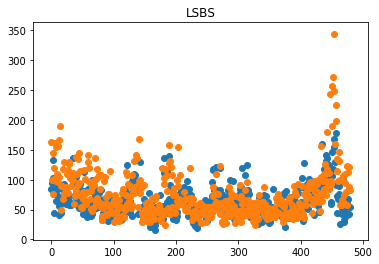

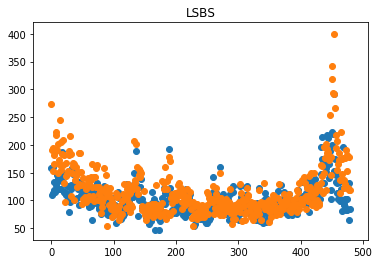

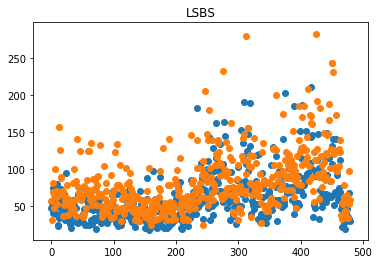

In [56]:
def shift_(original, data):
    objects = ["Unchanged", "New", "Fixed"]
    n = len(original[:,1])
    m = len(original[1,:])
    c = list(range(32, 64)) + [num for num in range(65,960) if num % 2 == 1]
    d = [num for num in range(64,1023) if num % 2 == 0]
    lb = len(d) #((n+1)-64)/2
    pages_ = np.zeros((2,lb))
    fbc = 0
    msbs, lsbs = 0, 0
    for i in range(0,lb):
        for j in range(0,m):
            lsb = Convert_Byte_to_Bit(int(original[d[i]][j]))
            msb = Convert_Byte_to_Bit(int(original[c[i]][j]))
            lsb_cor = Convert_Byte_to_Bit(int(data[d[i]][j]))
            msb_cor = Convert_Byte_to_Bit(int(data[c[i]][j]))

            for xx in range(0,len(lsb)):
                if ((lsb[xx] != lsb_cor[xx])):
                        lsbs += 1
                if ((msb[xx] != msb_cor[xx])):
                        msbs += 1
        if (msbs < 1500) and (lsbs < 1500):
                pages_[0][i] = msbs
                pages_[1][i] = lsbs
        lsbs, msbs = 0, 0
    fbc += 1
#     comparaison(original, pages_, 'Chip 0 - Block 1605')
    return pages_

def lb():
    datas = []
    for data in dd:
        pagesfbc = shift_(original, data)
        np.shape(pagesfbc)
        datas.append(pagesfbc)
        
    return datas
# lbs = lb()

def msb_testing(original, data):
    objects = ["Unchanged", "New", "Fixed"]
    n = len(original[:,1])
    m = len(original[1,:])
    c = list(range(32, 64)) + [num for num in range(65,960) if num % 2 == 1] # MSB
    d = [num for num in range(64,1023) if num % 2 == 0] #LSB
    lb = len(d) #((n+1)-64)/2
    pages_ = np.zeros((3,lb))
    fbc = 0
    msbs, lsbs = 0, 0
    for i in range(0,lb):
        for j in range(0,m):
            lsb = original[d[i]][j]
            msb = original[c[i]][j]
            lsb_cor = data[d[i]][j]
            msb_cor = data[c[i]][j]

            if ((lsb != lsb_cor)):
                    lsbs += 1
            if ((msb != msb_cor)):
                    msbs += 1
        if (msbs < 1500) and (lsbs < 1500):
            pages_[0][i] = i
            pages_[1][i] = msbs
            pages_[2][i] = lsbs
        lsbs, msbs = 0, 0
#     print(msbs, lsbs)
#     comparaison(original, pages_, 'Chip 0 - Block 1605')
    return pages_
k = 0
for data in dd:
    plt.figure(k)
    pages_ = msb_testing(original, data)
    print(np.sum(pages_[1]), np.sum(pages_[2]))
    plt.scatter(pages_[0], pages_[1])
    plt.title("MSBS")
    plt.scatter(pages_[0], pages_[2])
    plt.title("LSBS")
    k += 1
    
''' 
62495 62092
34218 33451
35003 34334
35125 34553
'''

'''
Chip 0 - 
52332 72204
28354 39239
29826 39454
30278 39329
'''

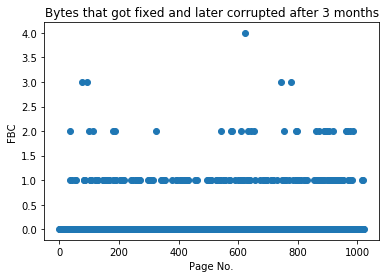

In [67]:
# Page by Page Analysis if fixed bytes are again corrected
# page_number = 500

def page_analysis(original, radiated_data, relaxed_data):
    n = len(original[:,1])
    m = len(original[1,:])
    kk = n-900
    corr = []
    count = 0
    count0 = 0
    k=0
    objects = ["After 1 Month", "After 2 Months","After 3 Months"]
    for page_number in range(1, n):
        for j in range(0, m):
            if ((original[page_number][j] != radiated_data[page_number][j])
                and (original[page_number][j] == relaxed_data[page_number][j])
               and (original[page_number][j] != relaxed_data_1[page_number][j])):
                count += 1
                count0 += 1

    #         corr[0][i]= i
        if count < 1500:
            corr.append(count)
        count = 0
#         print(count)
#     plt.plot(corr)
    corrp = corr
#     plt.figure()
    plt.scatter([num for num in range(0,len(corrp))],corrp)
    plt.xlabel("Page No.")
    plt.ylabel("FBC")
    plt.title("Bytes that got fixed and later corrupted after 3 months")
#     plt.title("Page No. vs Fixed Bytes "+objects[k])
#     plt.show()
#     k+=1
#     print("Recovered rate is: ", round(100*count0/(n*m),2))
    count0 =0
    return corr
# for i in range(0, 1024):
a = page_analysis(original, radiated_data, relaxed_data)                   

In [85]:
pages_ = pages_new
plt.scatter(pages_[0], pages_[1], label="MSB")
# plt.ylim(0,1300)
plt.xlabel("Shared Page No.")
plt.ylabel("FBC")
plt.title("MSB and LSB Shared Pages Before Relaxation")
# plt.show()
plt.scatter(pages_[0], pages_[2], label="LSB")
plt.legend(loc="upper left")

# plt.legend("MSB","LSB")
# plt.title("LSB Pages")
# plt.ylim(0,1500)
plt.show()

print("Total of MSB fails" ,np.sum(pages_[1]))
print("Total of LSB fails" ,np.sum(pages_[2]))


NameError: name 'pages_new' is not defined

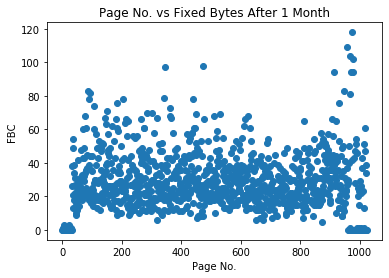

Recovered rate is:  0.16


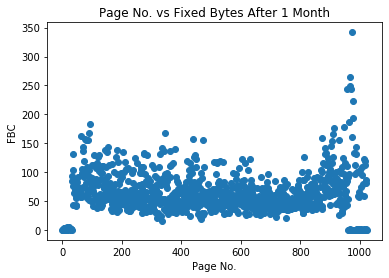

Recovered rate is:  0.35


In [57]:
#  failed bytes that got fixed
def fixed_bytes(original, relaxed_data, radiated_data):
    n = len(original[:,1])
    m = len(original[1,:])
    kk = n-900
    corr = np.zeros((1,n))
    count = 0
    count0 = 0
    k=0
    objects = ["After 1 Month", "After 2 Months","After 3 Months"]
#     for data in datas:
    for i in range(1, n):
        for j in range(0, m):
            if ((original[i][j] != radiated_data[i][j])
                and (original[i][j] == relaxed_data[i][j])):
#                and (radiated_data[i][j] != relaxed_data[i][j])):
                count += 1
                count0 += 1

#         corr[0][i]= i
        if count < 1500:
            corr[0][i] = count
        count = 0
    
        if(i == n-1):
            corrp = corr
            plt.figure()
            plt.scatter([num for num in range(0,len(corrp[0]))],corrp[0])
            plt.xlabel("Page No.")
            plt.ylabel("FBC")
            plt.title("Page No. vs Fixed Bytes "+objects[k])
            plt.show()
            k+=1
    print("Recovered rate is: ", round(100*count0/(n*m),2))
    count0 =0
    return corr
dat = []
for i in range(1, len(dd)):   
    fix = fixed_bytes(original, dd[i], radiated_data)
    dat.append(fix)


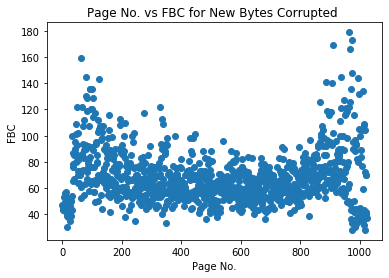

Corruption rate is:  0.37


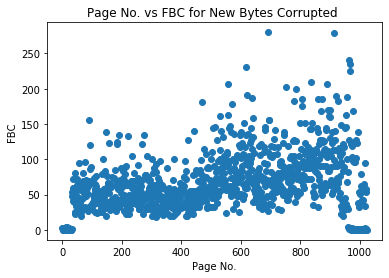

Corruption rate is:  0.36


In [58]:
# New fails in the data 
def new_fails(original, relaxed_data, radiated_data):
    n = len(original[:,1])
    m = len(original[1,:])
    corr = np.zeros((1,n))
    ms = np.zeros((1,n))
    count = 0
    count0 = 0
#     for data in datas:
    for i in range(0, n):
        for j in range(0, m):
            if ((original[i][j] == radiated_data[i][j]) 
                and (original[i][j] != relaxed_data[i][j])):
#                 print(relaxed_data[i][j], radiated_data[i][j])
                count += 1
                count0 += 1
                

#         corr[0][i]= i
        corr[0][i] = count
        count = 0
        if(i == n-1):
            corrp = corr
            plt.figure()
            plt.scatter([num for num in range(0,len(corrp[0]))],corrp[0])
            plt.xlabel("Page No.")
            plt.ylabel("FBC")
            plt.title("Page No. vs FBC for New Bytes Corrupted ")
#             plt.ylim(bottom=0, top= 1000)
            plt.show()
#                 k+=1
    print("Corruption rate is: ", round(100*count0/(n*m),2))
    count0 =0
    return corr

news = []
for i in range(1, len(dd)):   
    new = new_fails(original, dd[i], radiated_data)
    news.append(new)                
# new = new_fails()

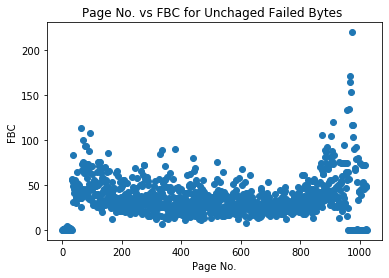

Corruption rate is:  0.19


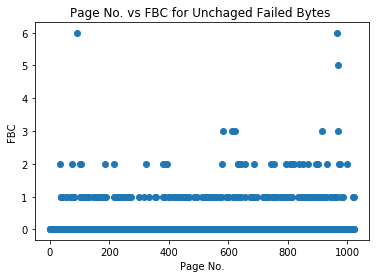

Corruption rate is:  0.0


In [60]:
# Fails that remain the same
def unchanged_fails(original, relaxed_data, radiated_data):
    n = len(original[:,1])
    m = len(original[1,:])
    corr = np.zeros((1,n))
    count = 0
    count0 = 0
#     for data in datas:
    for i in range(0, n):
        for j in range(0, m):
            if ((original[i][j] != radiated_data[i][j]) 
                and (original[i][j] != relaxed_data[i][j])
               and (radiated_data[i][j] == relaxed_data[i][j])):
                count += 1
                count0 += 1

#         corr[0][i]= i
        corr[0][i] = count
        count = 0
        if(i == n-1):
            corrp = corr
            plt.figure()
            plt.scatter([num for num in range(0,len(corrp[0]))],corrp[0])
            plt.xlabel("Page No.")
            plt.ylabel("FBC")
            plt.title("Page No. vs FBC for Unchaged Failed Bytes ")
            plt.show()
#                 k+=1
    print("Corruption rate is: ", round(100*count0/(n*m),2))
    count0 =0
    return corr

un = []
for i in range(1, len(dd)):   
    u = unchanged_fails(original, dd[i], radiated_data)
    un.append(u)                
# new = new_fails()                
# unchanged = unchanged_fails()

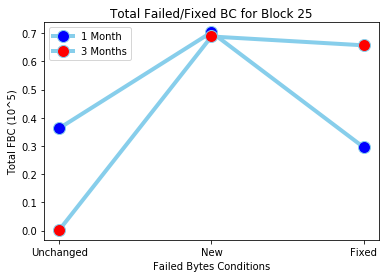

In [62]:
n = len(original[:,1])
m = len(original[1,:])
objects = ["Unchanged", "New", "Fixed"]
y_pos = np.arange(len(objects))

all_ = [np.sum(un[0][0]), np.sum(news[0][0]), np.sum(dat[0][0])] #, np.sum(new[1]), np.sum(fix[1])]
m2 = [np.sum(un[1][0]), np.sum(news[1][0]), np.sum(dat[1][0])]
# m3 = [np.sum(un[2][0]), np.sum(news[2][0]), np.sum(dat[2][0])]
all_ = [number/100000 for number in all_]
m2 = [number/100000 for number in m2]
# m3 = [number/100000 for number in m3]

# plt.bar(y_pos, all_, align='center', alpha=0.5)
plt.plot(y_pos, all_, marker='o', markerfacecolor='blue', label='1 Month',
         markersize=12, color='skyblue', linewidth=4), 
plt.plot(y_pos, m2, marker='o', markerfacecolor='red', label='3 Months',
         markersize=12, color='skyblue', linewidth=4)
# plt.plot(y_pos, m3, marker='o', markerfacecolor='grey', label='3 Months',
#          markersize=12, color='skyblue', linewidth=4)
plt.legend()
plt.xticks(y_pos, objects)
plt.ylabel('Total FBC (10^5)')
plt.xlabel('Failed Bytes Conditions')
plt.title("Total Failed/Fixed BC for Block 25")
plt.show()

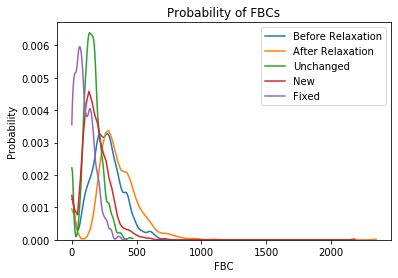

In [21]:
from scipy.interpolate import make_interp_spline, BSpline
import seaborn as sns

fo = [total_before[0], total_before[1], unchanged[1], new[1], fix[1]]
foo = ["Before Relaxation", "After Relaxation", "Unchanged", "New", "Fixed"]

i = 0
for dat in fo:
    T = np.array(fix[0])
    power = np.array(dat)
    xnew = np.linspace(T.min(),T.max(),300) #300 represents number of points to make between T.min and T.max

    spl = make_interp_spline(T, power, k=3) #BSpline object
    power_smooth = spl(xnew)
    plt.title("Probability of FBCs")
    plt.xlabel("FBC")
    plt.ylabel("Probability")
#     plt.plot(xnew,power_smooth)
    sns.kdeplot(dat, bw=0.15, label=foo[i])
#     plt.plot(fix[0], dat, markevery=m)
#     plt.show()
    i += 1
plt.show()

In [131]:
def lsb_vs_msb():
    n = len(original[:,1])
    m = len(original[1,:])
    corr = np.zeros((3,n))
    count = 0
    count0 = 0
    lsb, msb = 0,0
#     for data in datas:
    for i in range(0, n):
        for j in range(0, m):
            if ((original[i][j] != radiated_data[i][j]) 
                and (original[i][j] != relaxed_data[i][j])):
                count += 1
                count0 += 1
                if (original[i][j] > radiated_data[i][j]):
                    msb += 1
                else:
                    lsb += 1

        corr[0][i]= i
        corr[1][i] = msb
        corr[2][i] = lsb
        lsb, msb = 0,0
        count = 0
        if 0:#(i == n-1):
            corrp = corr
            plt.figure()
            plt.scatter(corrp[0],corrp[1])
            plt.xlabel("Page No.")
            plt.ylabel("FBC")
            plt.title("Page No. vs FBC for chip ")
            plt.show()
#                 k+=1
    print("Corruption rate is: ", round(100*count0/(n*m),2))
    count0 =0
    return corr


def shift_pages():
    n = len(original[:,1])
    m = len(original[1,:])
    c = list(range(32, 64)) + [num for num in range(65,960) if num % 2 == 1]
    d = [num for num in range(64,1023) if num % 2 == 0]
    lb = len(d) #((n+1)-64)/2
    pages_fail = np.zeros((2,lb))
    fbc = 0
    msbs, lsbs = 0, 0
    ml = np.zeros((2,lb))
    for data in datas:
        for i in range(0,lb):
    #         print(c[i], d[i])
            for j in range(0,m):
                lsb = Convert_Byte_to_Bit(int(original[d[i]][j]))
                msb = Convert_Byte_to_Bit(int(original[c[i]][j]))
                lsb_cor = Convert_Byte_to_Bit(int(data[d[i]][j]))
                msb_cor = Convert_Byte_to_Bit(int(data[c[i]][j]))
                for xx in range(0,len(lsb)):
                    if lsb[xx] != lsb_cor[xx]:
                        lsbs += 1
                    if msb[xx] != msb_cor[xx]:
                        msbs += 1
                    if ((lsb[xx] != lsb_cor[xx]) and (msb[xx] != msb_cor[xx])):
                        fbc += 1

            pages_fail[1][i] = fbc
            pages_fail[0][i] = i
            fbc =0
#         print("Average FBC for LSB and MSB being corrupted together", np.sum(pages_fail[1])/(480))
#         plt.scatter(pages_fail[0], pages_fail[1])
#         plt.title("")
#         plt.xlabel("Page No.")
#         plt.ylabel("FBC")
#         plt.savefig("block_223_unchanged_fails.png")
#         plt.show()
#         print(msbs, lsbs)
    return pages_fail

msbs = lsb_vs_msb()

Corruption rate is:  1.31


In [38]:
'''import seaborn as sns

plt.scatter(msbs[0],msbs[2])
plt.show()
# plt.hist(msbs[1],50, density=True, facecolor='g', alpha=0.75)
# plt.hist(msbs[2],50, density=True, facecolor='g', alpha=0.75)
sns.kdeplot(msbs[1],bw=0.1)
sns.kdeplot(msbs[2],bw=0.1)
plt.show() '''

"import seaborn as sns\n\nplt.scatter(msbs[0],msbs[2])\nplt.show()\n# plt.hist(msbs[1],50, density=True, facecolor='g', alpha=0.75)\n# plt.hist(msbs[2],50, density=True, facecolor='g', alpha=0.75)\nsns.kdeplot(msbs[1],bw=0.1)\nsns.kdeplot(msbs[2],bw=0.1)\nplt.show() "

In [159]:
print("Average FBCs")
fo = [total_before[0], total_before[1], unchanged[1], new[1], fix[1]]
all_ = [np.sum(total_before[0]), np.sum(total_before[1]), np.sum(unchanged[1]), np.sum(new[1]), np.sum(fix[1])]

avgs = [number/len(new) for number in all_]
print(avgs)

Average FBCs
[228707.0, 190448.0, 124922.0, 65526.0, 103785.0]


In [35]:
print(165942/103618)
print(363163 /273251)

1.6014785075952054
1.329045456375274


In [52]:
import numpy as np
import matplotlib.pyplot as plt


orr = np.genfromtxt('./Random_Data_Pattern_new.txt', delimiter=',')
chip = 'chip1'
original = orr[:,1:]
if chip == 'chip0':
########## Chip 0 ######################
    file0 = np.genfromtxt('./chip0/Read10KR1605_1_new_new.txt', delimiter=',')
    file1 = np.genfromtxt('./chip0/Read3D_chip0_blk1605_10krad_new.txt', delimiter=',')
    file2 = np.genfromtxt('./chip0/Read3D_chip0_blk1605_10krad_readretry0_new.txt', delimiter=',')
    file3 = np.genfromtxt('./chip0/Chip_3D_0_Block_1605_RandomData_Mar28_ReadRetry_SetFeature_0.txt', delimiter=',')
    
    file_name = 'Chip0 - Blk 1'
    # file2 = np.genfromtxt('./chip0/Read3D_chip0_blk1605_10krad_new.txt', delimiter=',')
elif chip == 'chip1':
    ########## Chip 1 ######################
    file0 = np.genfromtxt('./chip1/Read10KR25_1_new.txt', delimiter=',')
    file1 = np.genfromtxt('./chip1/Chip1_Block25_RandomData_WithShift_ReadRetry_SetFeature_0_new.txt', delimiter=',')
    file1 = np.genfromtxt('./chip1/Chip_1_Block25_RandomData_ReadRetry_Mar18_SetFeature_0_new.txt', delimiter=',')
    
elif chip == 'chip2':
    ########## Chip 2 ######################
    file0 = np.genfromtxt('./chip2/Read20KR_B300_1_new.txt', delimiter=',')
    file1 = np.genfromtxt('./chip2/Read3D_chip2_blk300_20krad_new.txt', delimiter=',')
    file1 = np.genfromtxt('./chip2/Chip_3D_2_Block_300_RandomData_April_1_ReadRetry_SetFeature_0_new.txt', delimiter=',')

elif chip == 'chip3':
    ########## Chip 3 ######################
    file0 = np.genfromtxt('./chip3/Read3D_chip3_blk223_20krad_new.txt', delimiter=',')
    file1 = np.genfromtxt('./chip3/Chip_3D_3_Block223_Feb12_RandomData_ReadRetry_SetFeature_0.txt', delimiter=',')
    file2 = np.genfromtxt('./chip3/Chip_3D_3_Block_223_RandomData_April_1_ReadRetry_SetFeature_0.txt', delimiter=',')

elif chip == 'chip4':
    ########## Chip 4 ######################
    file0 = np.genfromtxt('./chip4/Read10KR_B1300_1_new.txt', delimiter=',')
    file1 = np.genfromtxt('./chip4/Read3D_chip4_blk1300_10krad_new.txt', delimiter=',')
#     file2 = np.genfromtxt('./chip0/Read3D_chip0_blk1605_10krad_new.txt', delimiter=',')
else:
    print("Incorrent chip")

relaxed_data = file1[:,1:]
relaxed_data_1 = file2[:,1:]
relaxed_data_2 = file3[:,1:]
radiated_data = file0[:,1:]




Corruption rate of  0.35 %
Corruption rate of  0.56 %
Corruption rate of  0.36 %


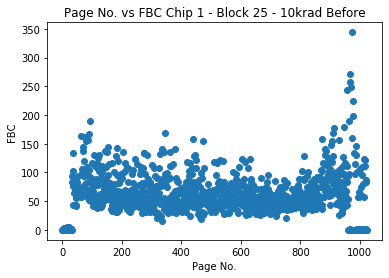

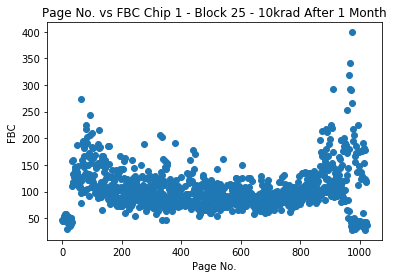

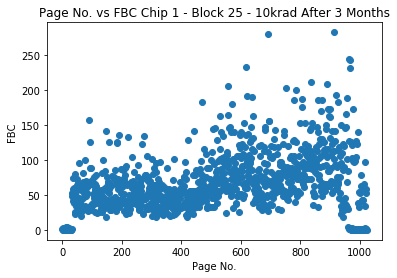

In [54]:
#################### General FBC Analysis ##########################
dd = [radiated_data, relaxed_data, relaxed_data_1]

def fbc():
    aa = ["Before", "After 1 Month", "After 3 Months","After 3 Months"]
    n = len(original[:,1])
    m = len(original[1,:])
    corr = np.zeros((2,n))
    ms = np.zeros((2,n))
    lsb, msb = 0,0
    count = 0
    count0 = 0
    f = np.zeros((4,n))
    k =0
    
    for data in dd:
        for i in range(0, n):
            for j in range(0, m):
                if(original[i][j] != data[i][j]):
                    count += 1
                    count0 += 1
#             if count < 1500:
            corr[1][i] = count
            corr[0][i]= i
            count = 0
            if(i == n-1):
                corrp = corr
                plt.figure()
                plt.scatter(corrp[0],corrp[1])
                plt.xlabel("Page No.")
                plt.ylabel("FBC")
                plt.title("Page No. vs FBC Chip 1 - Block 25 - 10krad "+str(aa[k]))
                plt.savefig("/home/wydglif/Documents/Research/relaxed_data_research/Read3D_chip0_blk1605_10krad_new "+str(aa[k])+"General fbc.png")
        f[k] = corr[1]    
        k+=1
        print("Corruption rate of ", round(100*count0/(n*m),2),"%")
        count0 =0
    return f

def lsbmsb():
    aa = ["Before", "After 1 Month", "After 3 Months","After 3 Months"]
    n = len(original[:,1])
    m = len(original[1,:])
    corr = np.zeros((2,n))
    ms = np.zeros((2,n))
    lsb, msb = 0,0
    count = 0
    count0 = 0
    f = np.zeros((4,n))
    k =0
    
    for data in dd:
        for i in range(0, n):
            for j in range(0, m):
                if(original[i][j] > data[i][j]):
                    count += 1
                    
                if(original[i][j] < data[i][j]):
                    count0 += 1
#             if count < 1500:
            corr[1][i] = count
            corr[0][i]= i
            
#         print("Corruption rate of ", round(100*count0/(n*m),2),"%")
        print(count, count0)
        count, count0 = 0,0
    return f

data_fbc = fbc()
# lsbmsb()


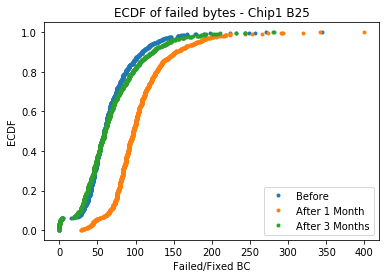

In [90]:
def cdf_plt():
    objects = ["Before","After 1 Month", "After 3 Months","After 3 Months"]
    n_bins = 100000
    k = 0
    
    ddd = [data_fbc[0], data_fbc[1], data_fbc[2]] #,lbs[2][1]]
    for i in range(0, len(ddd)):
        data = ddd[i]
        x = np.sort(data)
        y = np.arange(1, len(x)+1) / len(x)
        plt.figure(1)
        plt.plot(x,y, marker='.', linestyle='none', label=objects[k])
        plt.legend()
        k += 1
# evaluate the histogram
    values, base = np.histogram(data, bins=40)

    #evaluate the cumulative
    cumulative = np.cumsum(values)
        # plot the cumulative function
    #     plt.figure(2)
    #     plt.plot(base[:-1], cumulative)
        #plot the survival function
    #     plt.plot(base[:-1], len(all_shifts[1])-cumulative, c='green')

    plt.ylabel("ECDF")
    plt.xlabel("Failed/Fixed BC")
    plt.title("ECDF of failed bytes - Chip1 B25")
    plt.show()


cdf_plt()

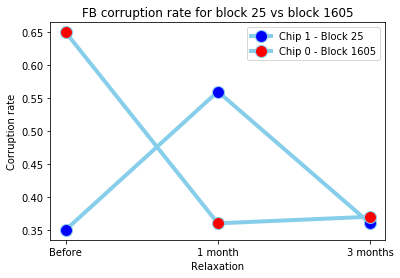

In [91]:
n = len(original[:,1])
m = len(original[1,:])
objects = ["Before", "1 month", "3 months"]
y_pos = np.arange(len(objects))

all_ = [0.35, 0.56, 0.36] #, np.sum(new[1]), np.sum(fix[1])]
m2 = [0.65, 0.36, 0.37]
# m3 = [np.sum(un[2][0]), np.sum(news[2][0]), np.sum(dat[2][0])]
all_ = [number for number in all_]
m2 = [number for number in m2]
# m3 = [number/100000 for number in m3]

# plt.bar(y_pos, all_, align='center', alpha=0.5)
plt.plot(y_pos, all_, marker='o', markerfacecolor='blue', label='Chip 1 - Block 25',
         markersize=12, color='skyblue', linewidth=4), 
plt.plot(y_pos, m2, marker='o', markerfacecolor='red', label='Chip 0 - Block 1605',
         markersize=12, color='skyblue', linewidth=4)
# plt.plot(y_pos, m3, marker='o', markerfacecolor='grey', label='3 Months',
#          markersize=12, color='skyblue', linewidth=4)
plt.legend()
plt.xticks(y_pos, objects)
plt.ylabel('Corruption rate')
plt.xlabel('Relaxation')
plt.title("FB corruption rate for block 25 vs block 1605")
plt.show()

In [88]:
np.shape(data_fbc)
# print(data_fbc[0])

(4, 1024)